In [1]:
import pandas as pd
import mplfinance as mpf
import numpy as np
from io import StringIO

In [2]:
# Sample data
data_str = """Date,Time,Open,High,Low,Close,Col7,Col8,Col9
2024.01.02,01:30:00,2068.308,2068.462,2066.869,2068.094,15,0,369
2024.01.02,01:45:00,2068.081,2068.951,2066.290,2066.536,15,0,369
2024.01.02,02:00:00,2066.512,2066.749,2063.891,2064.607,15,0,368
2024.01.02,02:15:00,2064.619,2066.983,2064.560,2066.596,15,0,369
2024.01.02,02:30:00,2066.597,2068.247,2065.657,2067.342,15,0,369
2024.01.02,02:45:00,2067.307,2068.267,2067.207,2067.669,15,0,367
2024.01.02,03:00:00,2067.693,2069.394,2066.422,2068.867,15,0,368
2024.01.02,03:15:00,2068.934,2069.863,2068.934,2069.631,15,0,368
2024.01.02,03:30:00,2069.589,2069.854,2069.295,2069.767,15,0,369
2024.01.02,03:45:00,2069.688,2070.338,2068.541,2069.487,15,0,368"""

# Load data
df = pd.read_csv(StringIO(data_str), sep=",")
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)
df = df[['Open','High','Low','Close']]

df['isBear'] = (df['Close'] < df['Open']).astype(int)

# Create the plot and get the figure and axes list
df.head()


,Open,High,Low,Close,isBear
DateTime,,,,,
2024-01-02 01:30:00,2068.308,2068.462,2066.869,2068.094,1
2024-01-02 01:45:00,2068.081,2068.951,2066.290,2066.536,1
2024-01-02 02:00:00,2066.512,2066.749,2063.891,2064.607,1
2024-01-02 02:15:00,2064.619,2066.983,2064.560,2066.596,0
2024-01-02 02:30:00,2066.597,2068.247,2065.657,2067.342,0


In [3]:
def add_vertical_lines_on_flagged_candles(axis, df, flag_col='isBear', color='red', linewidth=2):
    ax= axis[0]
    """
    Add full-plot-height vertical lines on flagged candles to an existing plot.
    """
    ylim = ax.get_ylim()  # Get current plot limits
    for i, flag in enumerate(df[flag_col]):
        if flag == 1:
            ax.vlines(i, ylim[0], ylim[1], color=color, linewidth=linewidth)
    ax.figure.canvas.draw()  # Update the figure


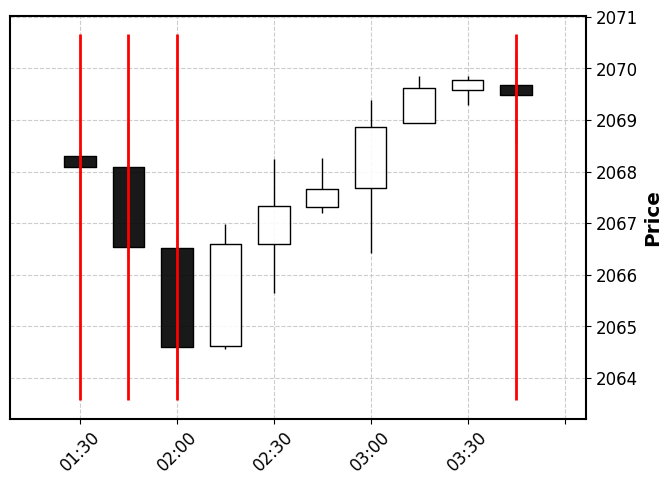

In [4]:
fig, axlist = mpf.plot(df, type='candle', style='classic', returnfig=True)

# Add vertical lines on flagged candles
add_vertical_lines_on_flagged_candles(axlist, df, flag_col='isBear')